In [1]:
import os
import sys
import pandas as pd
#import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from plots import *
from geopy.distance import geodesic
from find_net_stats import *
from graph_save_run import *
from spatial_helpers import *

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


In [2]:
#Create graph of all nodes
# now, filter for best fits 
# month best fit: (.04,.1,33297)
# seas best fit: (.03,.08,21709)
# year best fit: (.08,.04,21906)
netfile = "../params/horticulture365_check_NZ.csv"
inc_fp  = "../params/window_psa.csv"
prop_fp = "../params/2024_prop_dat.csv"
post_fp = "temp_post.csv"
in_bond,out_bond = read_network_data(netfile)
prop_size = read_property_data(prop_fp)
m_bb,m_bw,m_s = .03,.09,["8878"]
s_bb,s_bw,s_s = .03,.08,["21729"]
y_bb,y_bw,y_s = .04,.07,["10322"]
D_m,D_s,D_y = 0.4,0.8,0.8
L = 3
T = 425+92
bar_x,bar_y = 6,6
max_infected = 3000
deltaT = 3
min_inc = 1
alpha = 0.1
F = 625
cal_month = 11
t,m_id,m_i = run_save_si_model(in_bond,out_bond,prop_size,m_bb,m_bw,D_m,m_s,T,max_infected,1,min_inc,alpha,F,cal_month)
t,s_id,s_i = run_save_si_model(in_bond,out_bond,prop_size,s_bb,s_bw,D_s,s_s,T,max_infected,3,min_inc,alpha,F,cal_month)
t,y_id,y_i = run_save_si_model(in_bond,out_bond,prop_size,y_bb,y_bw,D_y,y_s,T,max_infected,12,min_inc,alpha,F,cal_month)

In [3]:
for i in in_bond:
    all_vals = in_bond[i]
    for a in all_vals:
        int_a = int(a)
        int_i = int(i)
        if int_i == int_a:
            print("equivalent")

In [4]:
graph_types = ["Avg","Max","Min"]
ret_type = ["Contact)","Monthly)"]

In [5]:
all_data = {}
for g in graph_types:
    for r in ret_type:
        if r == ret_type[0]:
            val = calc_neigh_monthly_spread(m_id,in_bond,prop_fp,g.lower(),int(m_s[0]))
        if r == ret_type[1]:
            val = calc_monthly_spread(m_id,prop_fp,g.lower(),int(m_s[0]))
        all_data[g+"("+r] = val[3:]

21.0 109.0
21.0 109.0
21.0 109.0


In [6]:
print(all_data)

{'Avg(Contact)': [7.408438828924371, 0.42427832285415096, 15.425501774295542, 11.808204029276187, 17.3959066880542, 21.144027020163314, 18.811311149669674, 31.095489542076116, 21.06517412153253, 19.964333464670737, 19.19555743404876, 25.56863326609715, 23.980298063803907, 16.102296211605125], 'Avg(Monthly)': [0, 0, 23.90751255158156, 23.272874566784097, 37.74481284829748, 55.12812031393919, 45.58953297298438, 68.94942400889889, 85.95223123081568, 126.15265252126252, 139.20132713271994, 139.13996819863553, 161.73950651569248, 144.52281040465496], 'Max(Contact)': [7.408438828924371, 0.42427832285415096, 27.210952374575378, 46.259080164588184, 59.891974232166625, 84.44788173477698, 117.92954489964832, 721.9905056364331, 556.2067794564509, 403.8868201814036, 783.57131632421, 874.684139734356, 780.8258627356797, 327.30039252298985], 'Max(Monthly)': [0, 0, 34.62691465012301, 80.70889430501589, 124.84269481753815, 140.07396426676576, 178.1095257479607, 972.3038464366184, 614.802563679454, 722

Avg(Contact)
['Avg', 'Contact)']
Avg(Monthly)
['Avg', 'Monthly)']
Max(Contact)
['Max', 'Contact)']
Max(Monthly)
['Max', 'Monthly)']
Min(Contact)
['Min', 'Contact)']
Min(Monthly)
['Min', 'Monthly)']


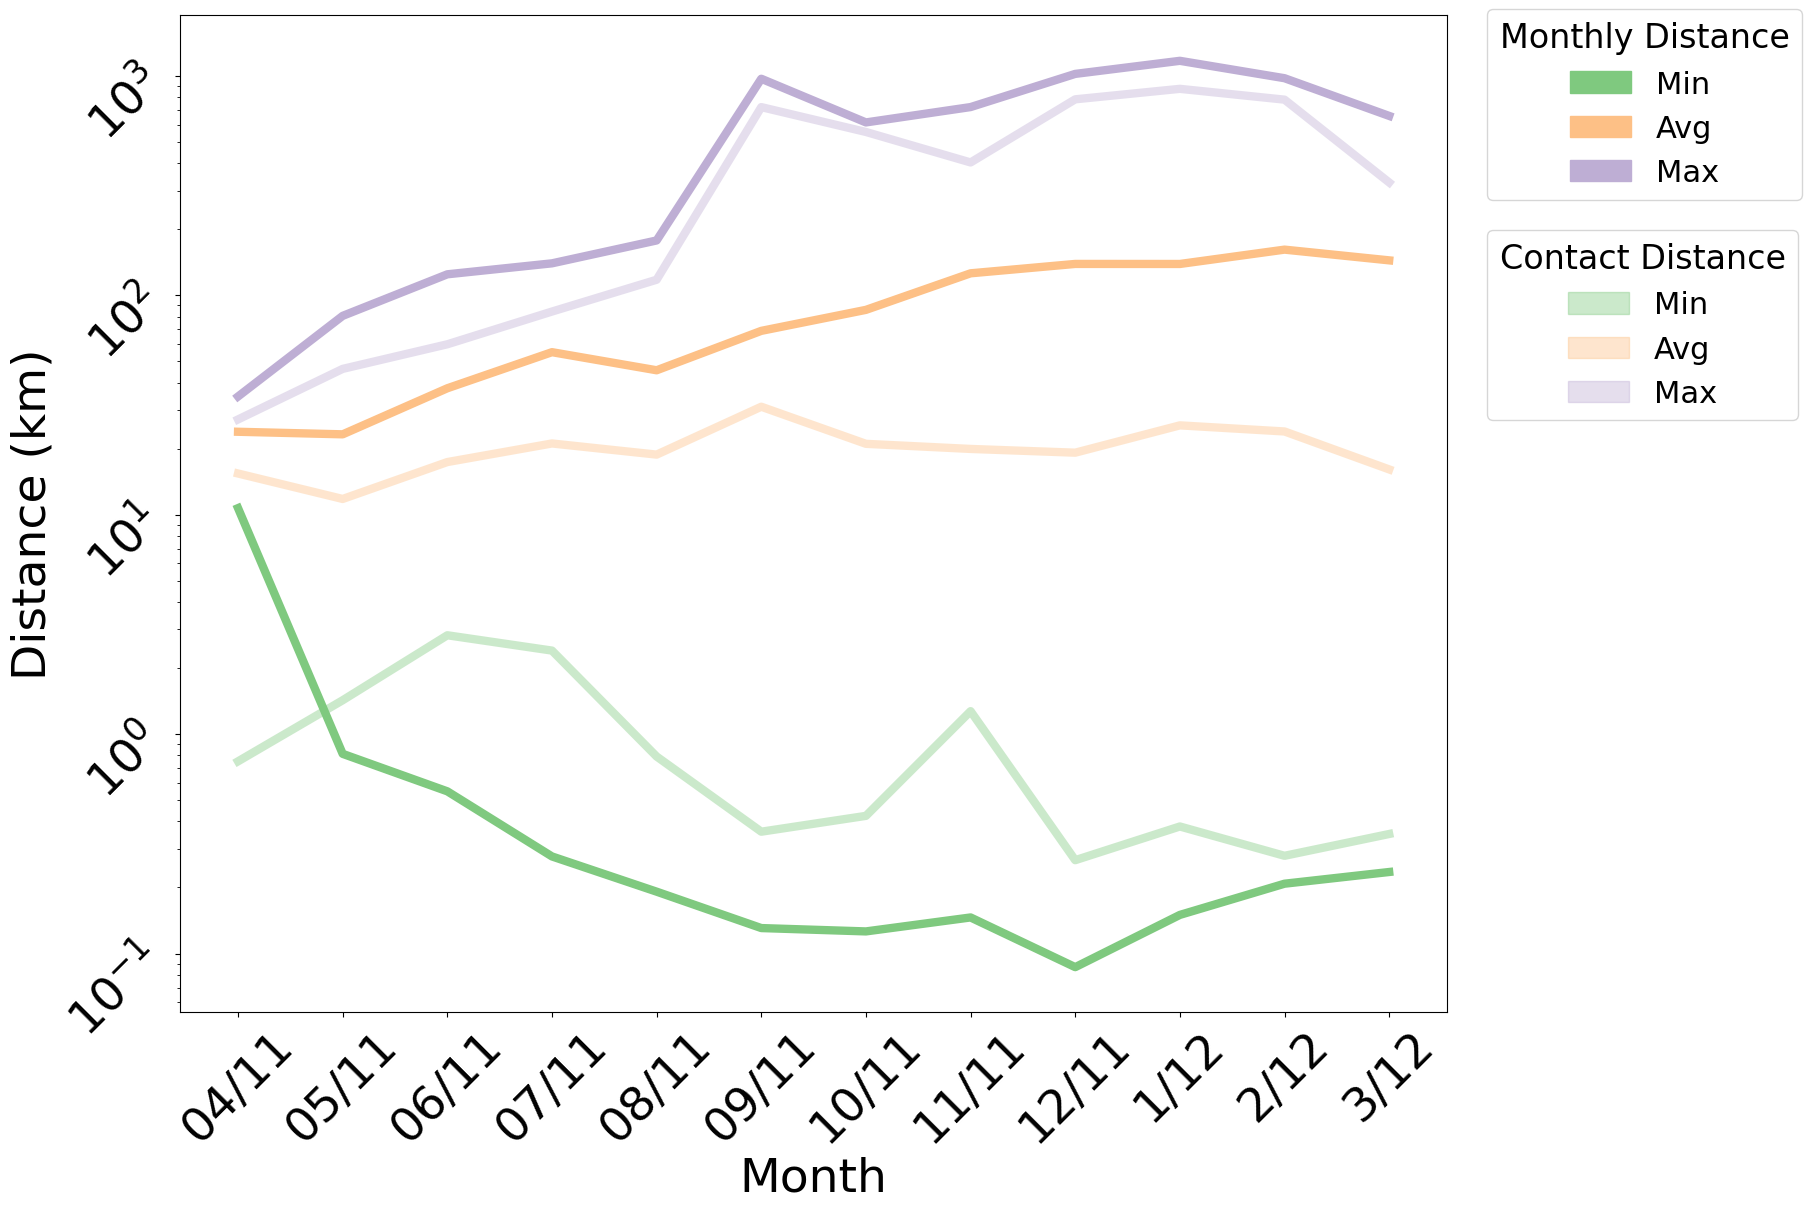

In [7]:
import matplotlib.patches as mpatches
colors = {"Avg":"#fdc086","Max":"#beaed4","Min":"#7fc97f"}
#x_vals = [i for i in range(0,len(neigh_min))]
bar_x,bar_y = 18,12
x_vals = ["04/11","05/11","06/11","07/11","08/11","09/11","10/11","11/11","12/11","1/12","2/12","3/12"]
fig,axs = plt.subplots(1,1,figsize=(bar_x,bar_y),constrained_layout=True)
alpha_type = {ret_type[0]:0.4,ret_type[1]:1}
lt = 6
for a in all_data:
    print(a)
    category = a.split("(")
    print(category)
    math_type,val_cat = category[0],category[1]
    y_plot = all_data[a]
    axs.plot(x_vals,y_plot[2:],color=colors[math_type],alpha=alpha_type[val_cat],lw=lt,label=a)
axs.tick_params(labelsize=34,rotation=45)
# plot average distance
axs.set_yscale('log')
axs.set_ylabel("Distance (km)",size=34)
axs.set_xlabel("Month",size=34)
#axs.legend(fontsize=24,bbox_to_anchor=(1, 0.5))
# --- build legend handles manually ---
contact_patches = [
    mpatches.Patch(color=colors["Min"], alpha=0.4, label="Min"),
    mpatches.Patch(color=colors["Avg"], alpha=0.4, label="Avg"),
    mpatches.Patch(color=colors["Max"], alpha=0.4, label="Max")
]

monthly_patches = [
    mpatches.Patch(color=colors["Min"], alpha=1.0, label="Min"),
    mpatches.Patch(color=colors["Avg"], alpha=1.0, label="Avg"),
    mpatches.Patch(color=colors["Max"], alpha=1.0, label="Max")
]

# --- add legends ---
first_legend = axs.legend(handles=contact_patches, 
                          title="Contact Distance", 
                          fontsize=22, title_fontsize=24,
                          loc="upper left", bbox_to_anchor=(1.02, 0.8))
axs.add_artist(first_legend)

axs.legend(handles=monthly_patches, 
           title="Monthly Distance", 
           fontsize=22, title_fontsize=24,
           loc="lower left", bbox_to_anchor=(1.02, 0.8))

plt.savefig("figs/dist_types.png")